In [1]:
import pandas as pd
import requests as rs
from io import BytesIO
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

In [2]:
df=pd.read_excel("I:/Data Science/Taabi/data scientist assignment for 1.5 to 3 years 1.xlsx")

In [3]:
df.head(10)

,uniqueid,ts,lat,lng,frequency,temperature,refuel,odo_distance,RAWFUELLEVEL
0,vehicle_1,2024-01-05 00:00:37.000,25.447653,85.289067,0,0,False,5759704.0,114.819080
1,vehicle_1,2024-01-05 00:01:07.000,25.447653,85.289067,0,0,False,5759704.0,114.819080
2,vehicle_1,2024-01-05 00:01:37.000,25.447653,85.289067,0,0,False,5759704.0,114.819080
3,vehicle_1,2024-01-05 00:01:48.000,25.447653,85.289067,0,0,False,5759704.0,114.819080
4,vehicle_1,2024-01-05 00:02:18.000,25.447653,85.289067,0,0,False,5759704.0,114.819080
5,vehicle_1,2024-01-05 00:02:37.000,25.447618,85.289045,0,0,False,5759708.5,114.819080
6,vehicle_1,2024-01-05 00:02:38.000,25.447618,85.289045,0,0,False,5759708.5,114.819080
7,vehicle_1,2024-01-05 00:02:49.000,25.447628,85.288922,0,0,False,5759721.0,114.819080
8,vehicle_1,2024-01-05 00:02:59.000,25.447628,85.288922,0,0,False,5759721.0,114.100562
9,vehicle_1,2024-01-05 00:03:09.000,25.447665,85.288653,0,0,False,5759748.0,113.941014


In [4]:
df.tail(10)

,uniqueid,ts,lat,lng,frequency,temperature,refuel,odo_distance,RAWFUELLEVEL
456339,vehicle_1,2024-04-04 23:58:40,25.433683,85.649722,0,32,False,28241868.0,0.0
456340,vehicle_1,2024-04-04 23:58:50,25.433940,85.650118,0,32,False,28241916.0,0.0
456341,vehicle_1,2024-04-04 23:59:00,25.434207,85.650463,0,32,False,28241962.0,0.0
456342,vehicle_1,2024-04-04 23:59:10,25.434493,85.650842,0,32,False,28242012.0,0.0
456343,vehicle_1,2024-04-04 23:59:20,25.434893,85.651270,0,32,False,28242074.0,0.0
456344,vehicle_1,2024-04-04 23:59:30,25.435478,85.651802,0,32,False,28242158.0,0.0
456345,vehicle_1,2024-04-04 23:59:40,25.436330,85.652575,0,32,False,28242280.0,0.0
456346,vehicle_1,2024-04-04 23:59:50,25.437335,85.653568,0,32,False,28242430.0,0.0
456347,vehicle_1,2024-04-05 00:00:00,25.438428,85.654705,0,32,False,28242596.0,0.0
456348,vehicle_1,2024-04-05 00:00:10,25.439387,85.655700,0,32,False,28242742.0,0.0


In [5]:
df.shape

(456349, 9)

## Checking Missing Values

In [6]:
df.isnull().sum()

uniqueid        0
ts              0
lat             0
lng             0
frequency       0
temperature     0
refuel          0
odo_distance    0
RAWFUELLEVEL    0
dtype: int64

#### No missing or null values are observed in the dataset

In [7]:
df.dtypes

uniqueid         object
ts               object
lat             float64
lng             float64
frequency         int64
temperature       int64
refuel             bool
odo_distance    float64
RAWFUELLEVEL    float64
dtype: object

In [8]:
df.describe(include="all")

,uniqueid,ts,lat,lng,frequency,temperature,refuel,odo_distance,RAWFUELLEVEL
count,456349,456349,456349.000000,456349.000000,456349.0,456349.000000,456349,4.563490e+05,456349.000000
unique,1,456349,NaN,NaN,NaN,NaN,1,NaN,NaN
top,vehicle_1,2024-01-05 00:00:37.000,NaN,NaN,NaN,NaN,False,NaN,NaN
freq,456349,1,NaN,NaN,NaN,NaN,456349,NaN,NaN
mean,NaN,NaN,25.464207,85.590943,0.0,24.016753,NaN,1.541509e+07,79.355041
std,NaN,NaN,0.038473,0.261588,0.0,7.164161,NaN,7.415849e+06,67.261187
min,NaN,NaN,25.332278,84.759122,0.0,0.000000,NaN,5.759704e+06,0.000000
25%,NaN,NaN,25.440312,85.412958,0.0,20.000000,NaN,8.740790e+06,0.000000
50%,NaN,NaN,25.454257,85.721707,0.0,24.000000,NaN,1.275901e+07,95.526277
75%,NaN,NaN,25.479857,85.798605,0.0,28.000000,NaN,2.348187e+07,137.990463


## Checking Duplicate Values

In [10]:
df.duplicated().sum()

0

#### No duplicate values are found

In [221]:
df.dtypes

ts                             object
lat                           float64
lng                           float64
temperature                     int64
odo_distance                  float64
RAWFUELLEVEL                  float64
ts_new                 datetime64[ns]
Refuel_Event                    int64
Refuel_Above_10L                int64
Pilferage_Event                 int64
Pilferage_Above_10L             int64
month                           int32
day                             int32
hour                            int32
minute                          int32
second                          int32
dtype: object

## Converting "ts" column from object type to datetime format by creating new column "ts_new"

In [12]:
df["ts_new"]=pd.to_datetime(df["ts"],format="%Y-%m-%d %H:%M:%S.%f")

## Handling Outliers

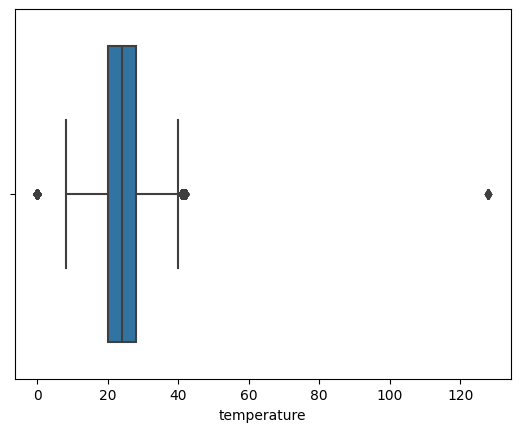

In [26]:
sns.boxplot(x="temperature", data=df)
plt.show()

In [33]:
df.shape

(456349, 13)

In [ ]:
## Replacing temperature with 1.5 * IQR rule

In [42]:
Q3=df["temperature"].quantile(0.75)
Q1=df["temperature"].quantile(0.75)
IQR= Q3-Q1
upper_bound= Q3 + 1.5 * IQR

In [44]:
df.loc[df["temperature"]>120,"temperature"]=upper_bound
## Total 8 records got updated

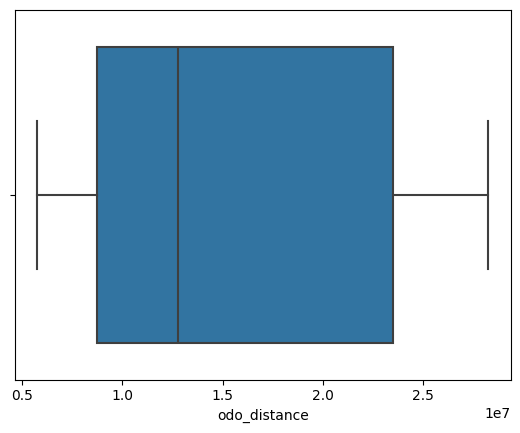

In [53]:
sns.boxplot(x="odo_distance", data=df)
plt.show()

#### No outlier is observed in odo_distance

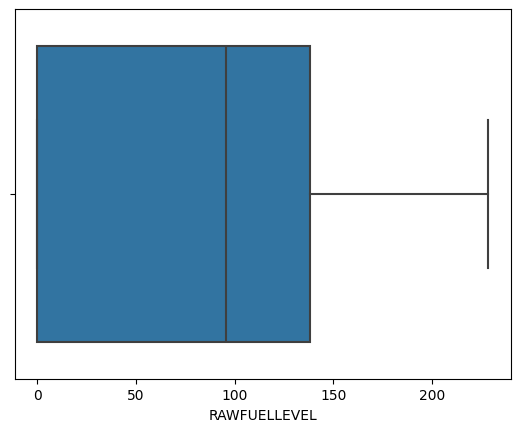

In [54]:
sns.boxplot(x="RAWFUELLEVEL", data=df)
plt.show()

#### No outlier is observed in RAWFUELLEVEL

### Creating four new columns:
### 1. "Refuel_Event" is 1 whenever a vehicle is getting refueled otherwise 0 
### 2. "Refuel_Above_10L" is 1 whenever a vehicle is getting refueled by more than 10 Litres otherwise it contains 0
### 3. "Pilferage_Event" is 1 whenever a pilferage event is happening otherwise 0
### 4. "Pilferage_Above_10L" is 1 whenever pilferage is happening by more than 10 Litres otherwise it contains 0

In [14]:
## Refuel_Event
refuel_event=[0]
for i in range(len(df)-1):
    if df.iloc[i]["RAWFUELLEVEL"] < df.iloc[i+1]["RAWFUELLEVEL"]:
        refuel_event.append(1)
    else:
        refuel_event.append(0)

In [15]:
df["Refuel_Event"]=pd.Series(refuel_event)

In [17]:
## Refuel_Above_10L
refuel_above_10L=[0]
for i in range(len(df)-1):
    if ((df.iloc[i+1]["RAWFUELLEVEL"]) - (df.iloc[i]["RAWFUELLEVEL"])) >10 :
        refuel_above_10L.append(1)
    else:
        refuel_above_10L.append(0)

In [18]:
df["Refuel_Above_10L"]=pd.Series(refuel_above_10L)

In [16]:
## Pilferage_Event
pilferage_event=[0]
for i in range(len(df)-1):
    if (df.iloc[i]["RAWFUELLEVEL"] > df.iloc[i+1]["RAWFUELLEVEL"]) & (df.iloc[i]["odo_distance"] == df.iloc[i+1]["odo_distance"]):
        pilferage_event.append(1)
    else:
        pilferage_event.append(0)

In [19]:
df["Pilferage_Event"]=pd.Series(pilferage_event)

In [64]:
## Pilferage_Above_10L
pilferage_above_10L=[0]
for i in range(len(df)-1):
    if ((df.iloc[i]["RAWFUELLEVEL"]) - (df.iloc[i+1]["RAWFUELLEVEL"]) > 10) & (df.iloc[i]["odo_distance"] == df.iloc[i+1]["odo_distance"]):
        pilferage_above_10L.append(1)
    else:
        pilferage_above_10L.append(0)

In [65]:
df["Pilferage_Above_10L"]=pd.Series(pilferage_above_10L)

## Dropping Irrelevant columns

In [57]:
df.drop(columns=["uniqueid","frequency","refuel"],inplace=True)
# All these three columns contains same value throughout the data

## Univariate Analysis

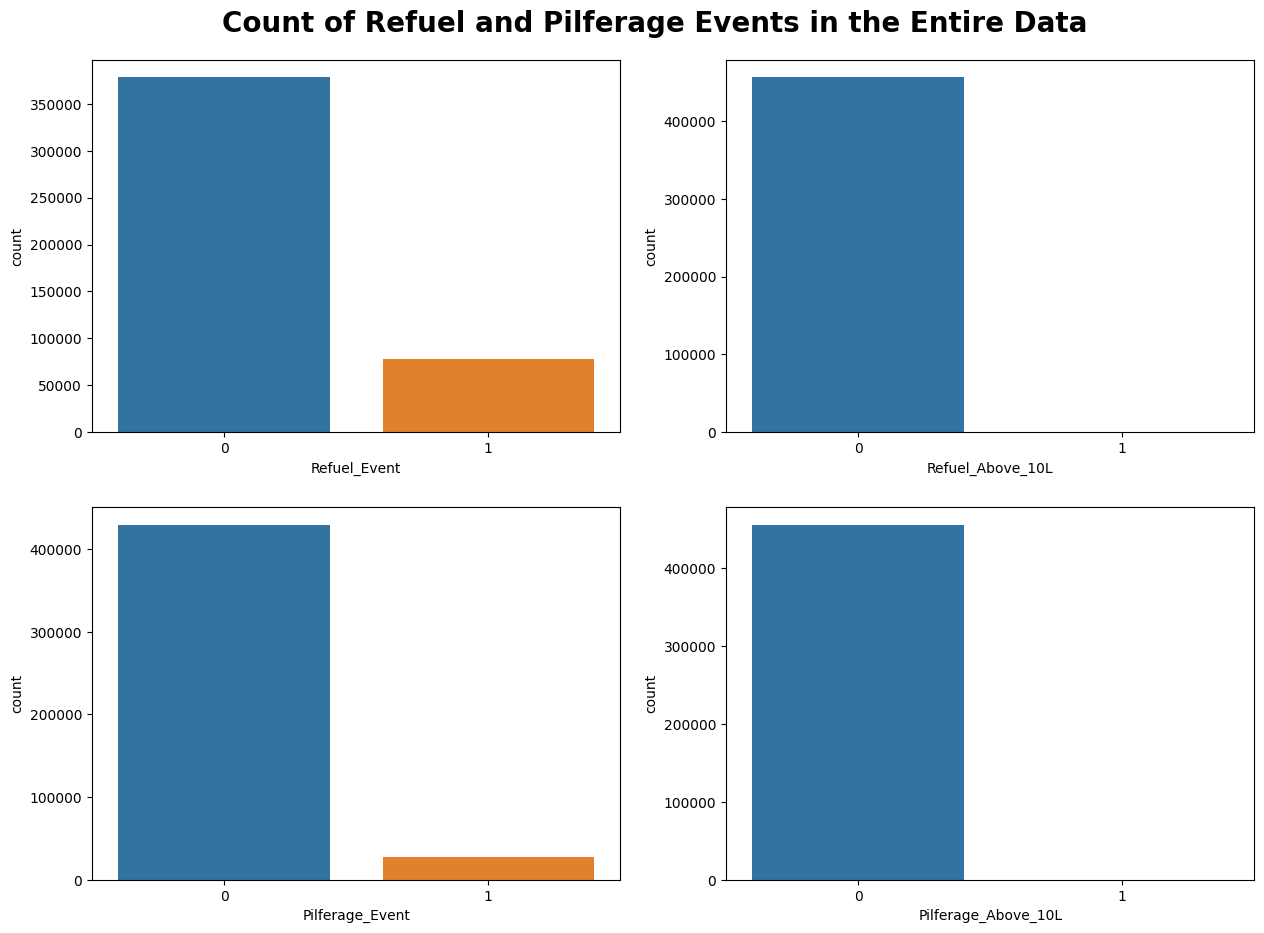

In [148]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x="Refuel_Event", data=df)

plt.subplot(2,2,2)
sns.countplot(x="Refuel_Above_10L", data=df)

plt.subplot(2,2,3)
sns.countplot(x="Pilferage_Event", data=df)

plt.subplot(2,2,4)
sns.countplot(x="Pilferage_Above_10L", data=df)

plt.subplots_adjust(top=0.93)
plt.suptitle("Count of Refuel and Pilferage Events in the Entire Data", fontweight="bold", fontsize=20)
plt.show()

## Bivariate Analysis

In [86]:
df.columns

Index(['ts', 'lat', 'lng', 'temperature', 'odo_distance', 'RAWFUELLEVEL',
       'ts_new', 'Refuel_Event', 'Refuel_Above_10L', 'Pilferage_Event',
       'Pilferage_Above_10L'],
      dtype='object')

In [118]:
df["Refuel_Event"].value_counts()

Refuel_Above_10L
0    455836
1       513
Name: count, dtype: int64

In [226]:
df["Pilferage_Event"].value_counts()

Pilferage_Event
0    429462
1     26887
Name: count, dtype: int64

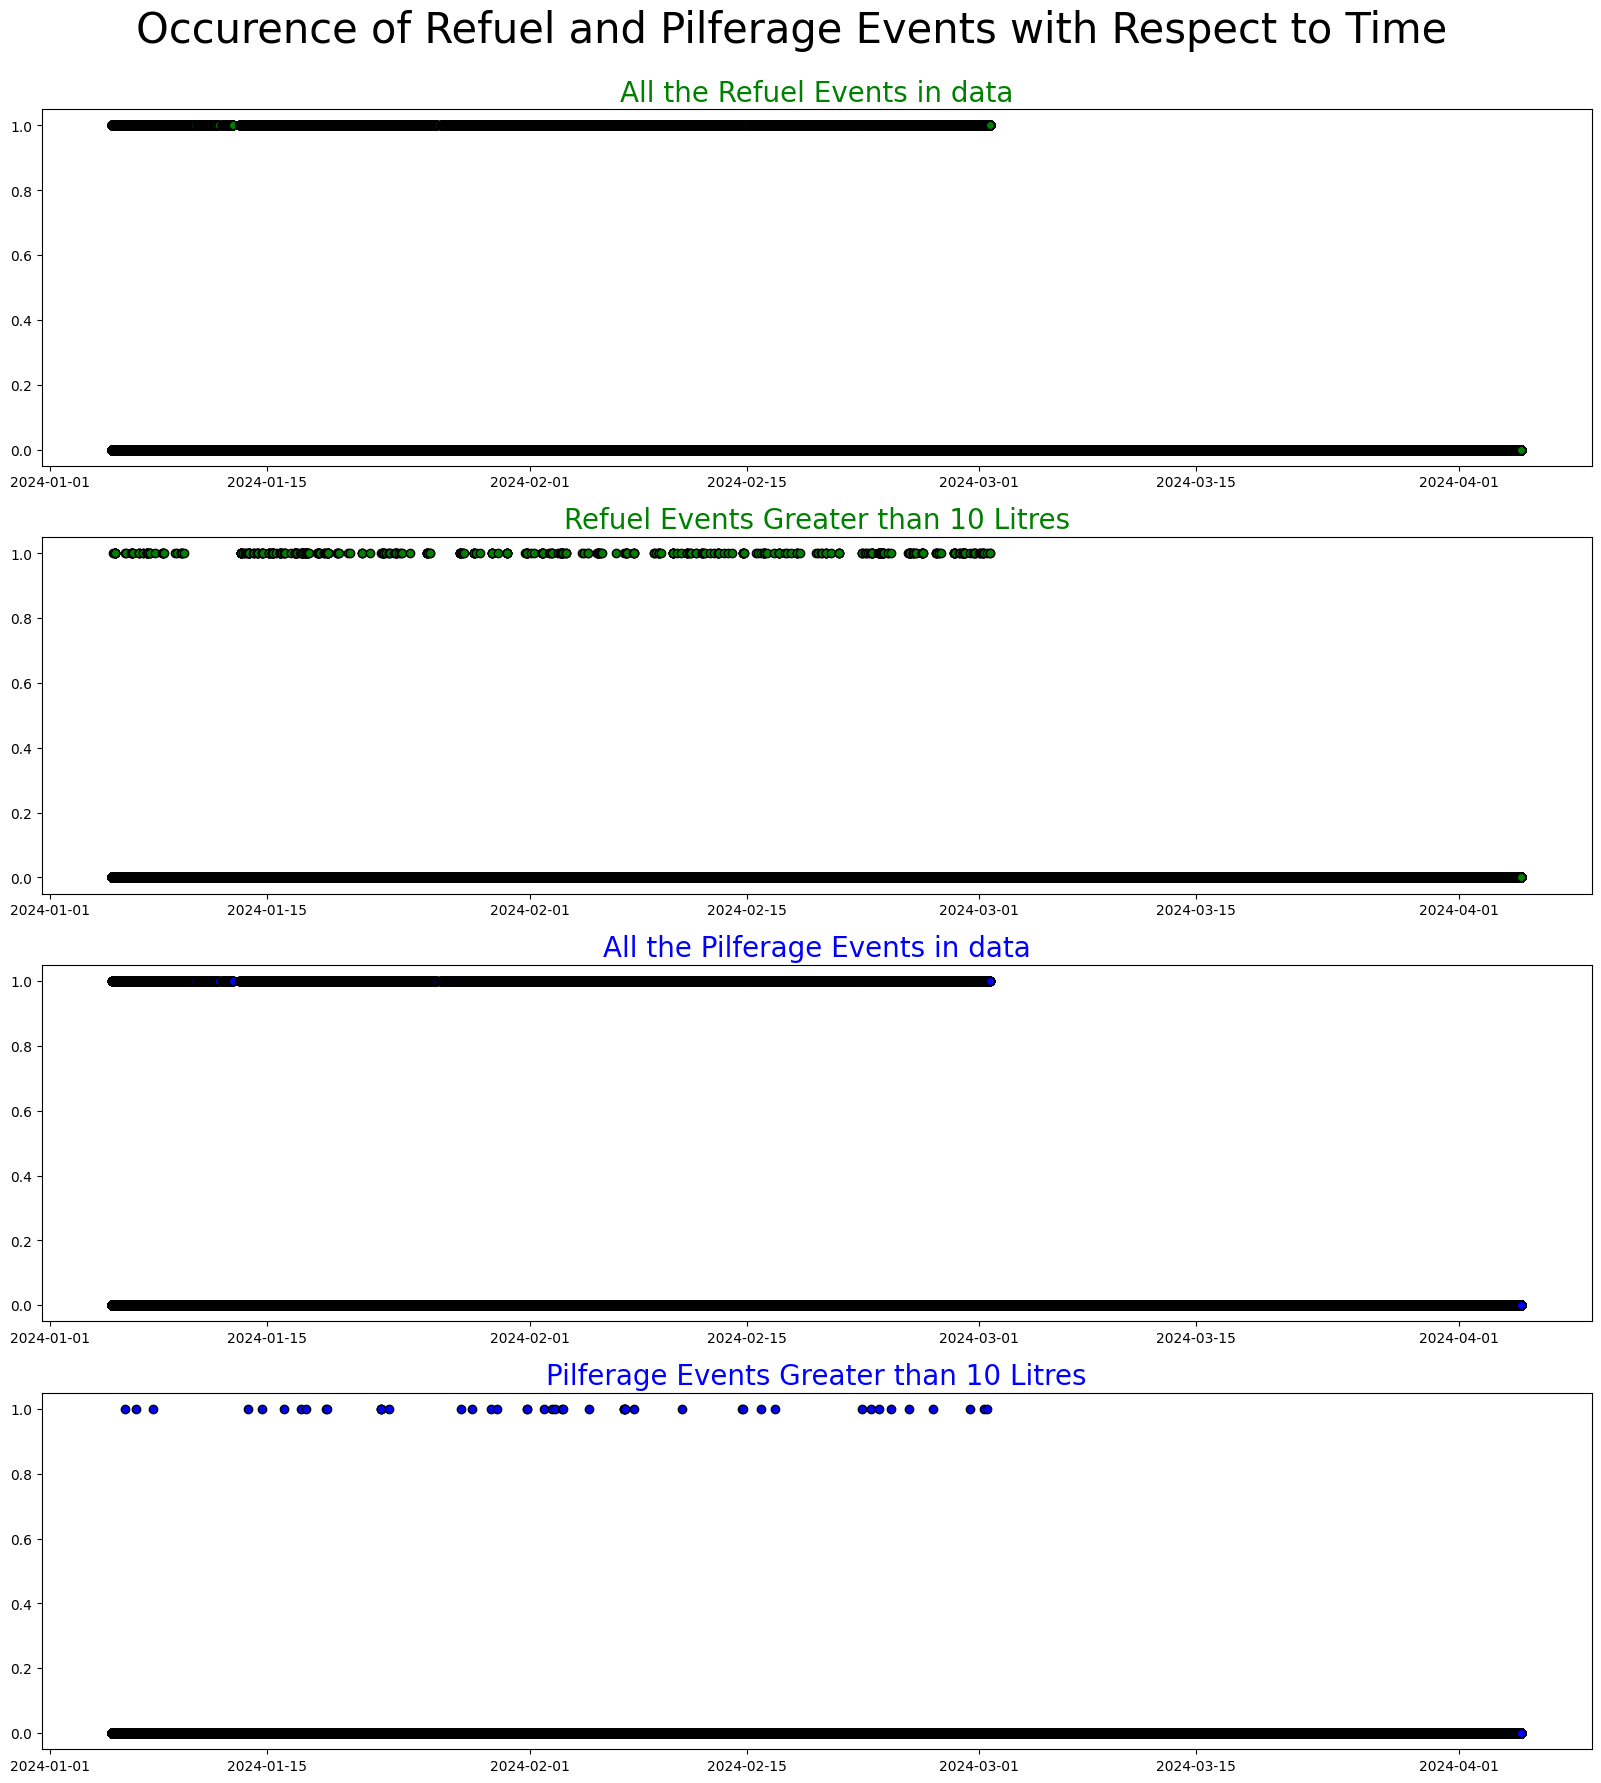

In [222]:
plt.figure(figsize=(20,20))
plt.subplot(4,1,1)
plt.plot(df["ts_new"],df["Refuel_Event"], "o", mec="black", mfc="green")
plt.title("All the Refuel Events in data", color="green", fontsize=20)

plt.subplot(4,1,2)
plt.plot(df["ts_new"],df["Refuel_Above_10L"], "o", mec="black", mfc="green")
plt.title("Refuel Events Greater than 10 Litres", color="green", fontsize=20)

plt.subplot(4,1,3)
plt.plot(df["ts_new"],df["Pilferage_Event"], "o", mec="black", mfc="blue")
plt.title("All the Pilferage Events in data", color="blue", fontsize=20)

plt.subplot(4,1,4)
plt.plot(df["ts_new"],df["Pilferage_Above_10L"], "o", mec="black", mfc="blue")
plt.title("Pilferage Events Greater than 10 Litres", color="blue", fontsize=20)

plt.subplots_adjust(top=0.93)
plt.suptitle("Occurence of Refuel and Pilferage Events with Respect to Time", fontsize=30)
plt.show()

In [248]:
df.columns

Index(['ts', 'lat', 'lng', 'temperature', 'odo_distance', 'RAWFUELLEVEL',
       'ts_new', 'Refuel_Event', 'Refuel_Above_10L', 'Pilferage_Event',
       'Pilferage_Above_10L', 'month', 'day', 'hour', 'minute', 'second'],
      dtype='object')

In [250]:
Refuel_events_df=df.set_index("ts_new")["Refuel_Event"].resample("d").sum().reset_index()

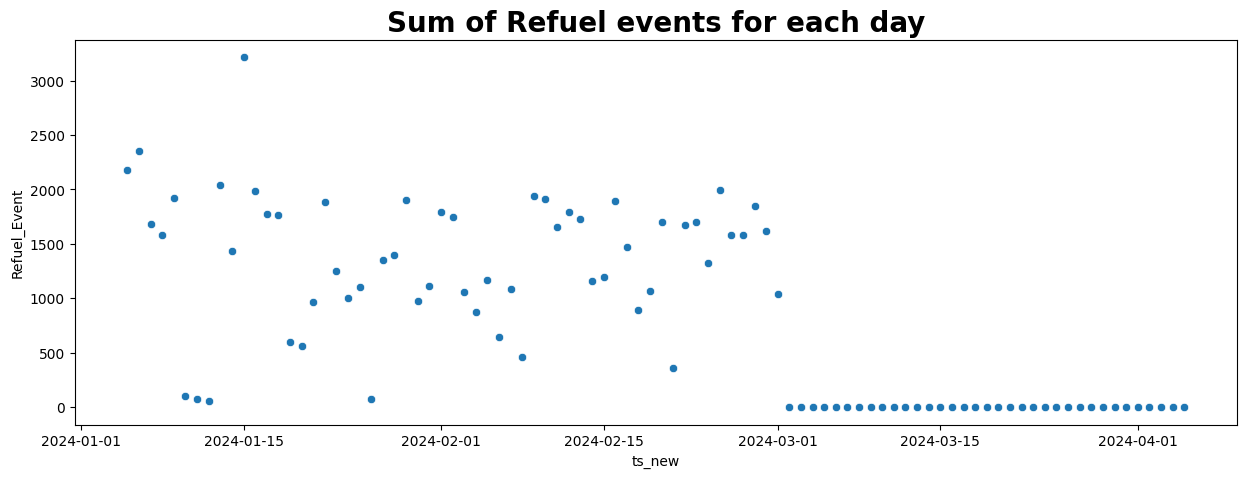

In [269]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="ts_new",y="Refuel_Event", data=Refuel_events_df)
plt.title("Sum of Refuel events for each day", fontweight="bold", fontsize=20)
plt.show()

In [258]:
Refuel_events_df=df.set_index("ts_new")["Refuel_Above_10L"].resample("d").sum().reset_index()

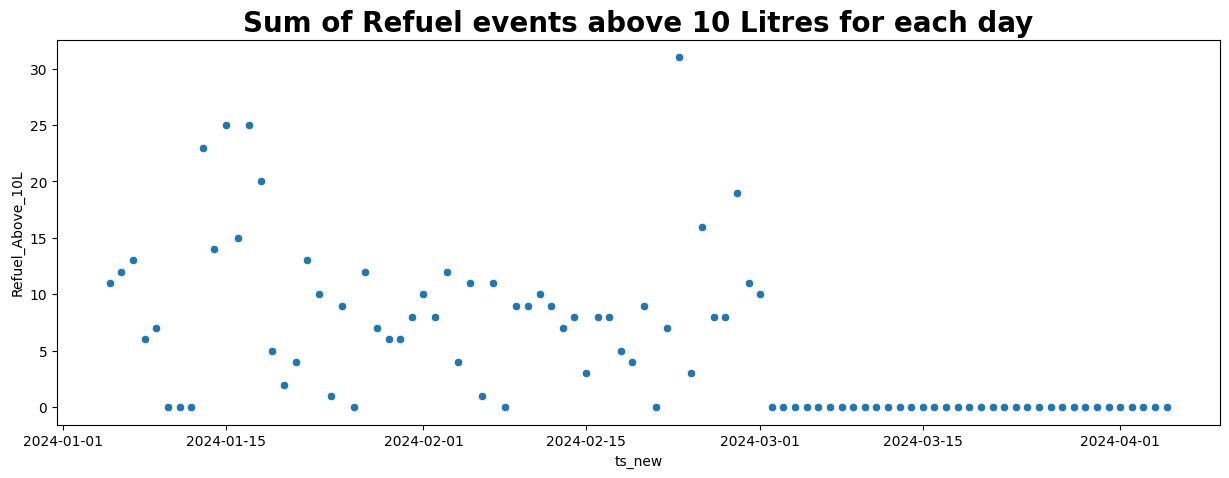

In [268]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="ts_new",y="Refuel_Above_10L", data=Refuel_events_tenL)
plt.title("Sum of Refuel events above 10 Litres for each day", fontweight="bold", fontsize=20)
plt.show()

In [262]:
Pilferage_events_df=df.set_index("ts_new")["Pilferage_Event"].resample("d").sum().reset_index()

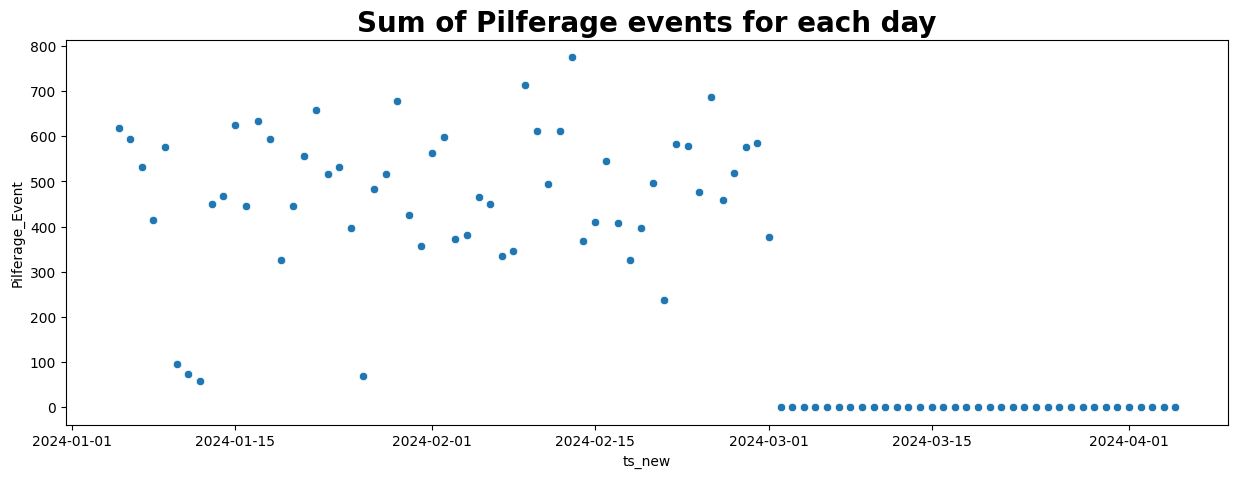

In [267]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="ts_new",y="Pilferage_Event", data=Pilferage_events_df)
plt.title("Sum of Pilferage events for each day", fontweight="bold", fontsize=20)
plt.show()

In [264]:
Pilferage_events_tenL_df=df.set_index("ts_new")["Pilferage_Above_10L"].resample("d").sum().reset_index()

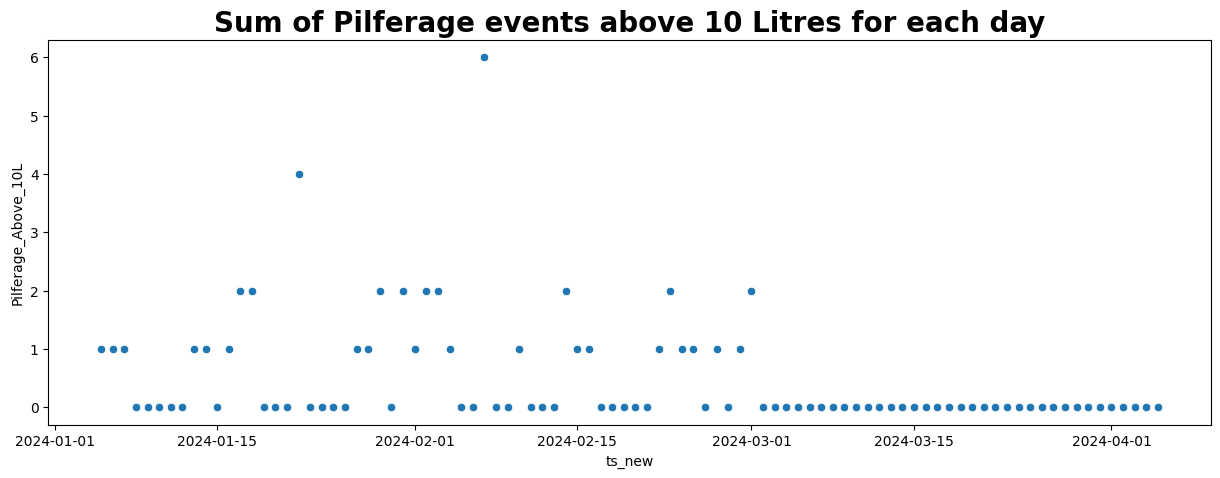

In [266]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="ts_new",y="Pilferage_Above_10L", data=Pilferage_events_tenL_df)
plt.title("Sum of Pilferage events above 10 Litres for each day", fontweight="bold", fontsize=20)
plt.show()

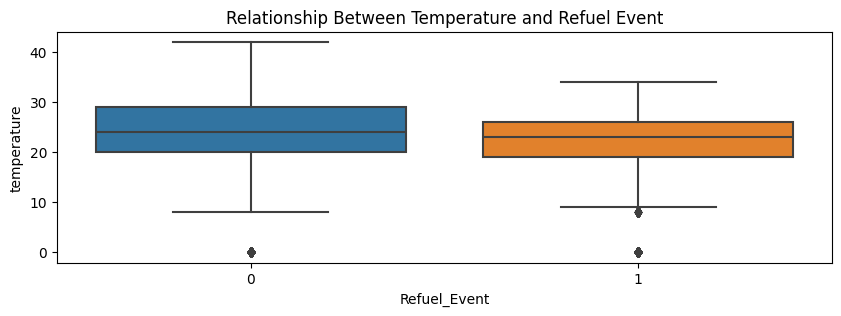

In [151]:
plt.figure(figsize=(10,3))
sns.boxplot(x="Refuel_Event", y="temperature", data=df)
plt.title("Relationship Between Temperature and Refuel Event")
plt.show()

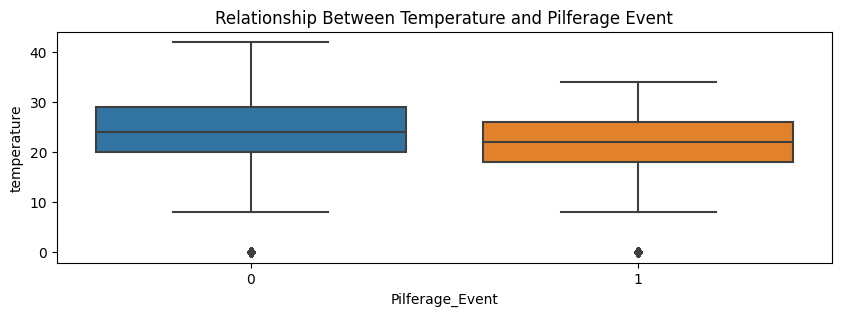

In [154]:
plt.figure(figsize=(10,3))
sns.boxplot(x="Pilferage_Event", y="temperature", data=df)
plt.title("Relationship Between Temperature and Pilferage Event")
plt.show()

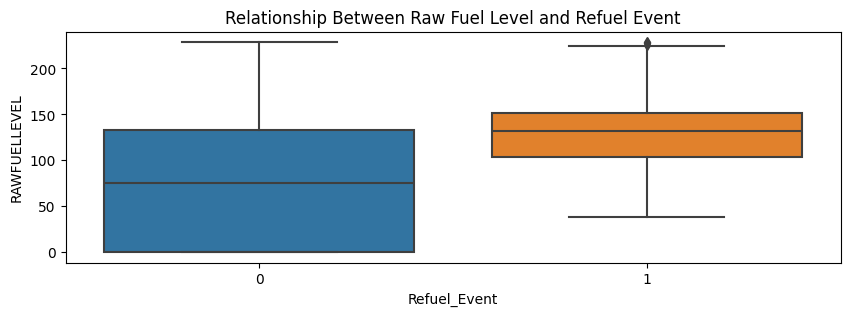

In [153]:
plt.figure(figsize=(10,3))
sns.boxplot(x="Refuel_Event", y="RAWFUELLEVEL", data=df)
plt.title("Relationship Between Raw Fuel Level and Refuel Event")
plt.show()

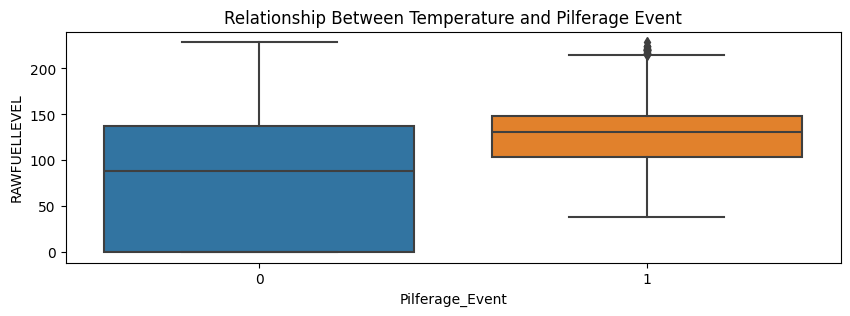

In [156]:
plt.figure(figsize=(10,3))
sns.boxplot(x="Pilferage_Event", y="RAWFUELLEVEL", data=df)
plt.title("Relationship Between Temperature and Pilferage Event")
plt.show()

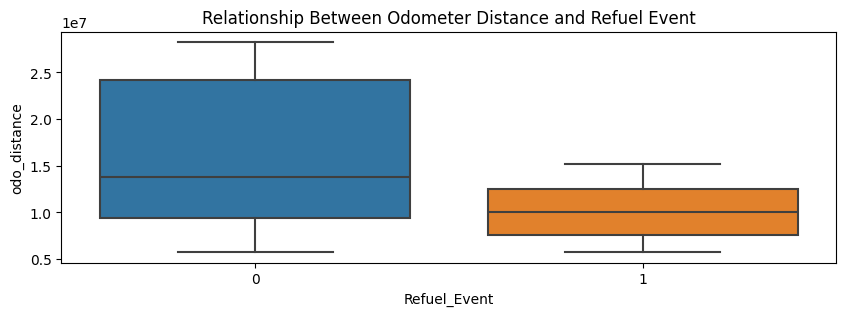

In [168]:
plt.figure(figsize=(10,3))
sns.boxplot(x="Refuel_Event", y="odo_distance", data=df)
plt.title("Relationship Between Odometer Distance and Refuel Event")
plt.show()

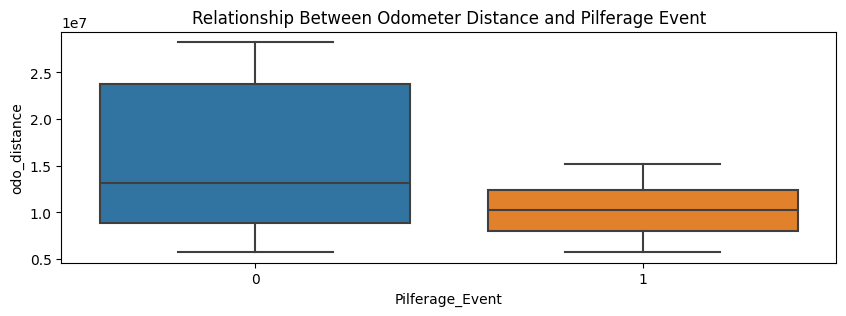

In [169]:
plt.figure(figsize=(10,3))
sns.boxplot(x="Pilferage_Event", y="odo_distance", data=df)
plt.title("Relationship Between Odometer Distance and Pilferage Event")
plt.show()

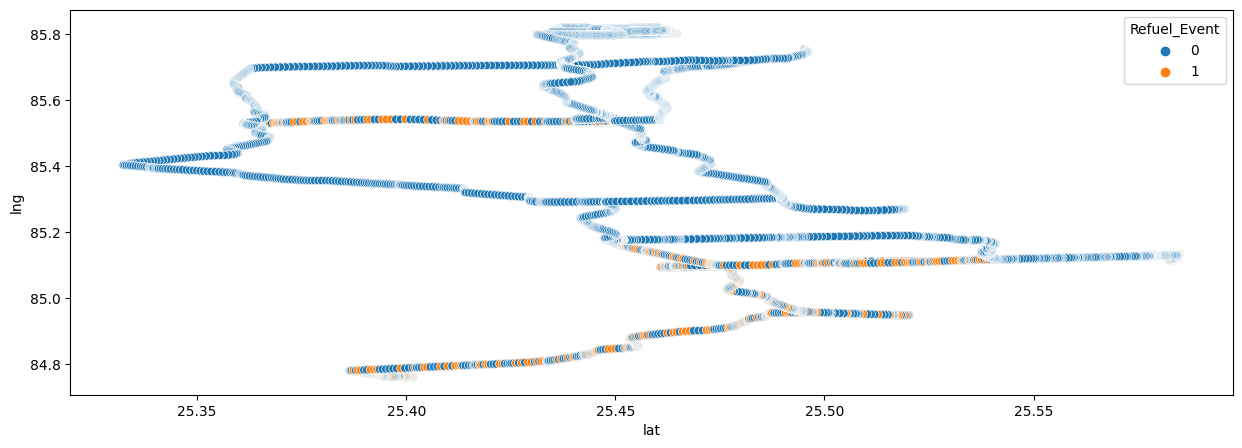

In [271]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="lat",y="lng",hue="Refuel_Event",data=df)
plt.show()

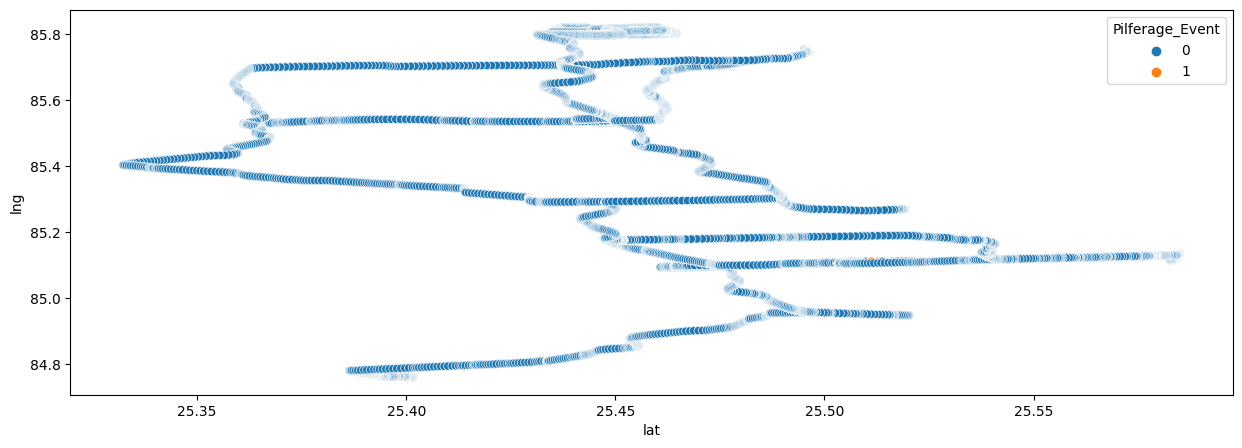

In [163]:
plt.figure(figsize=(15,5))
sns.scatterplot(x="lat",y="lng",hue="Pilferage_Event",data=df)
plt.show()

## Extracting values from Datetime column

In [183]:
df["year"] = df["ts_new"].dt.year
df["month'"] = df["ts_new"].dt.month
df["day"] = df["ts_new"].dt.day
df["hour"] = df["ts_new"].dt.hour
df["minute"] = df["ts_new"].dt.minute
df["second"] = df["ts_new"].dt.second

In [189]:
## Dropping year column as it is same for all the rows
df.drop(columns=["year"], inplace=True)

## Correlation Between Different Numeric Variables

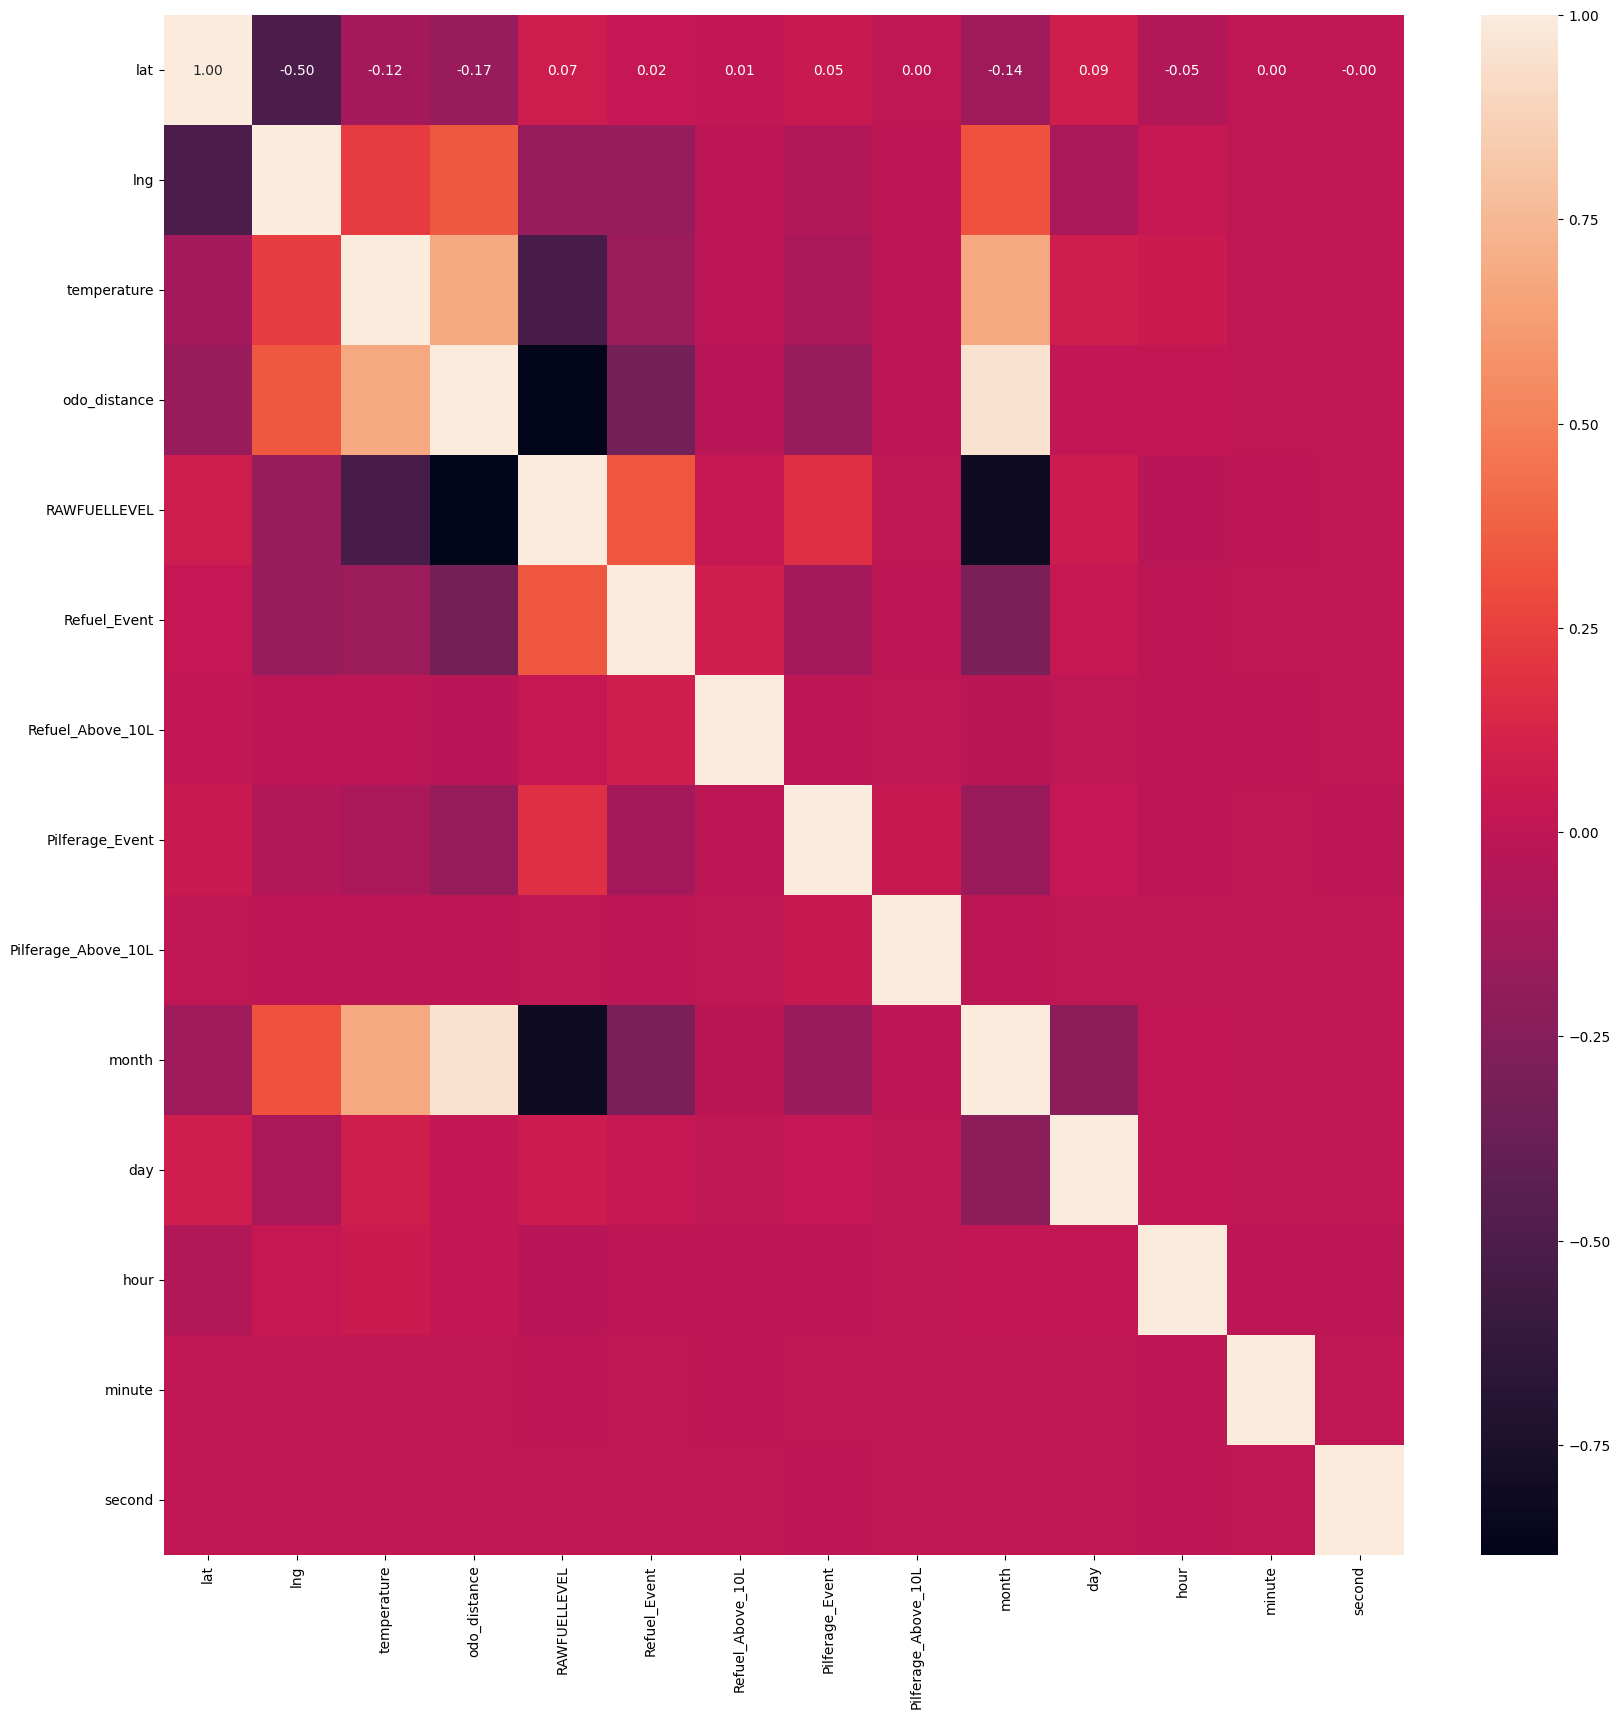

In [190]:
plt.figure(figsize=(20,20))
corr_matrix=df.select_dtypes(include=["float","int"]).corr()
sns.heatmap(corr_matrix,annot=True, fmt="0.2f")
plt.show()

## Applying Machine Learning Algorithm To Detech Refuel Events

In [193]:
X=df.drop(columns=["ts","ts_new","Refuel_Event","Refuel_Above_10L","Pilferage_Event","Pilferage_Above_10L"])
Y=df["Refuel_Above_10L"]

In [194]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3)

#### Standaradization to bring variables/ features to same scale

In [195]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

#### Logistic Regression

In [212]:
lr=LogisticRegression(solver="saga")
lr.fit(X_train,Y_train)
print(lr.score(X_train,Y_train))
print(lr.score(X_test,Y_test))

0.9988667810320432
0.9988970453964428


In [213]:
lr_y_pred=lr.predict(X_test)
print(classification_report(Y_test,lr_y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136754
           1       0.00      0.00      0.00       151

    accuracy                           1.00    136905
   macro avg       0.50      0.50      0.50    136905
weighted avg       1.00      1.00      1.00    136905



C:\Users\bansa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bansa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bansa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

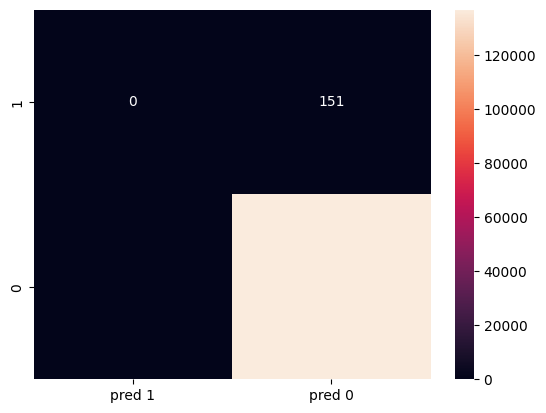

In [214]:
cm=confusion_matrix(Y_test,lr_y_pred, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["pred 1","pred 0"]])
sns.heatmap(df_cm,annot=True, fmt="g")

#### Gradient Boosting

In [209]:
gbc=GradientBoostingClassifier()

In [211]:
gbc_n_estimators=list(range(1,100))
gbc_dict=dict(n_estimators=gbc_n_estimators)
gbc_grid=GridSearchCV(gbc,param_grid=gbc_dict,cv=10)
gbc_grid.fit(X_train,Y_train)

In [ ]:
best_gbc_n_estimators=gbc_grid.best_estimator_.get_params()["n_estimators"]
GBC=GradientBoostingClassifier(n_estimators=best_gbc_n_estimators)
GBC.fit(X_train,Y_train)
print(GBC.score(X_train,Y_train))
print(GBC.score(X_test,Y_test))

In [ ]:
GBC_y_pred=GBC.predict(X_test)
print(classification_report(Y_test,GBC_y_pred))

#### Random Forest

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc_n_estimators=list(range(1,100))
rfc_max_features=list(range(9,22))
rfc_dict=dict(n_estimators=rfc_n_estimators, max_features=rfc_max_features)
rfc_grid=GridSearchCV(rfc,param_grid=rfc_dict,cv=10)
rfc_grid.fit(X_train,Y_train)

In [ ]:
best_rfc_n_estimators=rfc_grid.best_estimator_.get_params()["n_estimators"]
best_rfc_max_features=rfc_grid.best_estimator_.get_params()["max_features"]
RFC=RandomForestClassifier(n_estimators=best_rfc_n_estimators, max_features=best_rfc_max_features)
RFC.fit(X_train,Y_train)
print(RFC.score(X_train,Y_train))
print(RFC.score(X_test,Y_test))

In [ ]:
RFC_y_pred=RFC.predict(X_test)
print(classification_report(Y_test,RFC_y_pred))

## Applying Machine Learning Algorithm To Detect Pilferage Events

In [215]:
A=df.drop(columns=["ts","ts_new","Refuel_Event","Refuel_Above_10L","Pilferage_Event","Pilferage_Above_10L"])
B=df["Pilferage_Above_10L"]

In [216]:
A_train,A_test,B_train,B_test=train_test_split(A,B,test_size=0.3)

In [217]:
scaler = StandardScaler()
A_train = scaler.fit_transform(A_train)
A_test = scaler.transform(A_test)

#### Logistic Regression

In [218]:
lr=LogisticRegression(solver="saga")
lr.fit(A_train,B_train)
print(lr.score(A_train,B_train))
print(lr.score(A_test,B_test))

0.999899825947584
0.9998977393082794


In [219]:
lr_b_pred=lr.predict(A_test)
print(classification_report(B_test,lr_b_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    136891
           1       0.00      0.00      0.00        14

    accuracy                           1.00    136905
   macro avg       0.50      0.50      0.50    136905
weighted avg       1.00      1.00      1.00    136905



C:\Users\bansa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bansa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\bansa\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<Axes: >

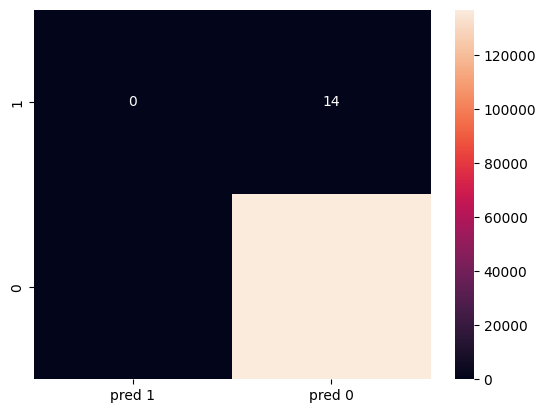

In [220]:
cm=confusion_matrix(B_test,lr_b_pred, labels=[1,0])
df_cm=pd.DataFrame(cm,index=[i for i in ["1","0"]],columns=[i for i in ["pred 1","pred 0"]])
sns.heatmap(df_cm,annot=True, fmt="g")

#### Gradient Bossting

In [ ]:
gbc=GradientBoostingClassifier()

In [ ]:
gbc_n_estimators=list(range(1,100))
gbc_dict=dict(n_estimators=gbc_n_estimators)
gbc_grid=GridSearchCV(gbc,param_grid=gbc_dict,cv=10)
gbc_grid.fit(A_train,B_train)

In [ ]:
best_gbc_n_estimators=gbc_grid.best_estimator_.get_params()["n_estimators"]
GBC=GradientBoostingClassifier(n_estimators=best_gbc_n_estimators)
GBC.fit(A_train,B_train)
print(GBC.score(A_train,B_train))
print(GBC.score(A_test,B_test))

In [ ]:
GBC_b_pred=GBC.predict(X_test)
print(classification_report(B_test,GBC_b_pred))

#### Random Forest

In [ ]:
rfc=RandomForestClassifier()

In [ ]:
rfc_n_estimators=list(range(1,100))
rfc_max_features=list(range(9,22))
rfc_dict=dict(n_estimators=rfc_n_estimators, max_features=rfc_max_features)
rfc_grid=GridSearchCV(rfc,param_grid=rfc_dict,cv=10)
rfc_grid.fit(A_train,B_train)

In [ ]:
best_rfc_n_estimators=rfc_grid.best_estimator_.get_params()["n_estimators"]
best_rfc_max_features=rfc_grid.best_estimator_.get_params()["max_features"]
RFC=RandomForestClassifier(n_estimators=best_rfc_n_estimators, max_features=best_rfc_max_features)
RFC.fit(A_train,B_train)
print(RFC.score(A_train,B_train))
print(RFC.score(A_test,B_test))

In [ ]:
RFC_b_pred=RFC.predict(A_test)
print(classification_report(B_test,RFC_b_pred))